In [1]:
from load import load, split

In [2]:
data = load()
data

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,Adopted
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,1,Yes
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,2,Yes
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,7,Yes
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,8,Yes
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0,0,No
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,1,Yes
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0,1,Yes
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0,3,No


In [3]:
print("Value counts:")
print(data["Adopted"].value_counts())
print("\nProportions:")
print(data["Adopted"].value_counts() / len(data["Adopted"]))

Value counts:
Yes    8457
No     3080
Name: Adopted, dtype: int64

Proportions:
Yes    0.733033
No     0.266967
Name: Adopted, dtype: float64


Unbalanced data, so want to do stratified sampling for train/test/validation split.

In [4]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = split(data)

In [5]:
# Number of unique values in each column
cardinalities = [(n, len(d.value_counts())) for n, d in X_train.iteritems()]
print(cardinalities)

[('Type', 2), ('Age', 93), ('Breed1', 148), ('Gender', 2), ('Color1', 7), ('Color2', 7), ('MaturitySize', 3), ('FurLength', 3), ('Vaccinated', 3), ('Sterilized', 3), ('Health', 3), ('Fee', 58), ('PhotoAmt', 30)]


## Type

In [6]:
X_train["Type"].value_counts()

Dog    3972
Cat    2950
Name: Type, dtype: int64

In [7]:
dog_adopted = len(X_train["Type"][(X_train["Type"] == "Dog") & y_train])
dog_not_adopted = len(X_train["Type"][(X_train["Type"] == "Dog") & (1-y_train)])
dog_proportion = dog_adopted / (dog_adopted + dog_not_adopted)
cat_adopted = len(X_train["Type"][(X_train["Type"] == "Cat") & y_train])
cat_not_adopted = len(X_train["Type"][(X_train["Type"] == "Cat") & (1-y_train)])
cat_proportion = cat_adopted / (cat_adopted + cat_not_adopted)
print(f"{dog_adopted = }")
print(f"{dog_not_adopted = }")
print(f"{dog_proportion = :.3f}")
print(f"{cat_adopted = }")
print(f"{cat_not_adopted = }")
print(f"{cat_proportion = :.3f}")

dog_adopted = 2843
dog_not_adopted = 1129
dog_proportion = 0.716
cat_adopted = 2231
cat_not_adopted = 719
cat_proportion = 0.756


## Age

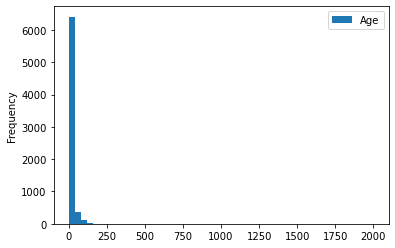

In [8]:
ax = X_train.plot.hist(column=["Age"], bins=50)

Seems that some of the age data is invalid.

<AxesSubplot:ylabel='Frequency'>

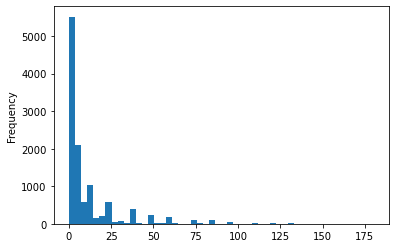

In [9]:
data["Age"][data["Age"] < 200].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

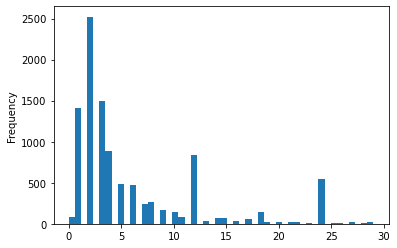

In [10]:
data["Age"][data["Age"] < 30].plot.hist(bins=50)

- Oldest recorded dog ~= 29 (source: https://www.guinnessworldrecords.com/world-records/oldest-dog)
- Oldest recorded cat ~= 38 (source: https://a-z-animals.com/blog/the-top-10-oldest-cats-ever/)
Will therefore truncate age.

---

I stopped here due to time constraints.